# Data Exploration

En esta sección haremos una exploración superficial de los datos recogidos en el dataset que se ha procesado previamente, para poder visualizar la distribución de los datos y detectar anomalías, como datos faltantes o extraños, rapidemente.

Se importa el dataframe pulido del trabajo

In [ ]:
import pandas as pd 
import numpy as np 
import os
import sys
%matplotlib inline

In [275]:
root_project = os.path.dirname(os.getcwd())
sys.path.append(root_project)
movies_df_pkl_dir = root_project + '/resources/movies_df.pkl'
movies_pkl_df = pd.read_pickle(movies_df_pkl_dir)
movies_df = movies_pkl_df.copy()

In [276]:
movies_df.head()

,title,release_date,original_language,genres,budget,revenue,production_countries,runtime,vote_average,vote_count
0,Toy Story,1995-10-30,en,"[Animation, Comedy, Family]",30000000,373554033.0,[United States of America],81.0,7.7,5415.0
1,Jumanji,1995-12-15,en,"[Adventure, Fantasy, Family]",65000000,262797249.0,[United States of America],104.0,6.9,2413.0
2,Grumpier Old Men,1995-12-22,en,"[Romance, Comedy]",0,0.0,[United States of America],101.0,6.5,92.0
3,Waiting to Exhale,1995-12-22,en,"[Comedy, Drama, Romance]",16000000,81452156.0,[United States of America],127.0,6.1,34.0
4,Father of the Bride Part II,1995-02-10,en,[Comedy],0,76578911.0,[United States of America],106.0,5.7,173.0


In [277]:
movies_df.describe()

,budget,revenue,runtime,vote_average,vote_count
count,4.546300e+04,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,4.224579e+06,1.120935e+07,94.128199,5.618207,109.897338
std,1.742413e+07,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,2.787965e+09,1256.000000,10.000000,14075.000000


Empezamos por comprobar si los nombres de las películas son todos únicos o si se repite algún valor

In [278]:
len(movies_df) - movies_df.title.nunique()

3186

In [279]:
movies_df.title.nunique()

42277

In [280]:
movies_df.title[movies_df.title.duplicated(False)]

5                         Heat
6                      Sabrina
16       Sense and Sensibility
25                     Othello
27                  Persuasion
                 ...          
45418               Pickpocket
45450                      Mom
45451        The Morning After
45457               Robin Hood
45460                 Betrayal
Name: title, Length: 5516, dtype: object

Se visualizarán los datos de cada columna con gráficos acordes al tipo de información que guardan. Iremos columna a columna:

In [281]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### -release_date

In [282]:
import datetime

In [283]:
released_movies_Y = movies_df['release_date'].groupby(movies_df.release_date.dt.to_period("M")).agg('count')

In [284]:
released_movies_Y

release_date
1874-12    1
1878-06    1
1883-11    1
1887-08    1
1888-01    1
          ..
2018-03    1
2018-04    2
2018-11    1
2018-12    1
2020-12    1
Freq: M, Name: release_date, Length: 1350, dtype: int64

In [285]:
movies_df['release_date'].groupby(movies_df.release_date.dt.to_period("M")).agg('count').sort_values(ascending=False)

release_date
2011-09    247
2014-10    245
2008-01    242
2014-09    241
2012-09    238
          ... 
1911-01      1
1910-11      1
1910-09      1
1910-06      1
1874-12      1
Freq: M, Name: release_date, Length: 1350, dtype: int64

In [286]:
x = [datetime.datetime.now() + datetime.timedelta(hours=i) for i in range(12)]

In [287]:
x[0]

datetime.datetime(2021, 1, 9, 17, 10, 13, 313316)

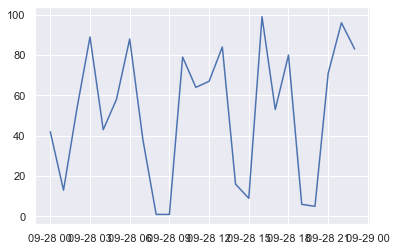

In [288]:
x = np.array([datetime.datetime(2013, 9, 28, i, 0) for i in range(24)])
y = np.random.randint(100, size=x.shape)

plt.plot(x,y)
plt.show()

In [293]:
x_axes = released_movies_Y.index.astype(int)
y_axes = released_movies_Y.values

In [294]:
released_movies_Y.index[0]

Period('1874-12', 'M')

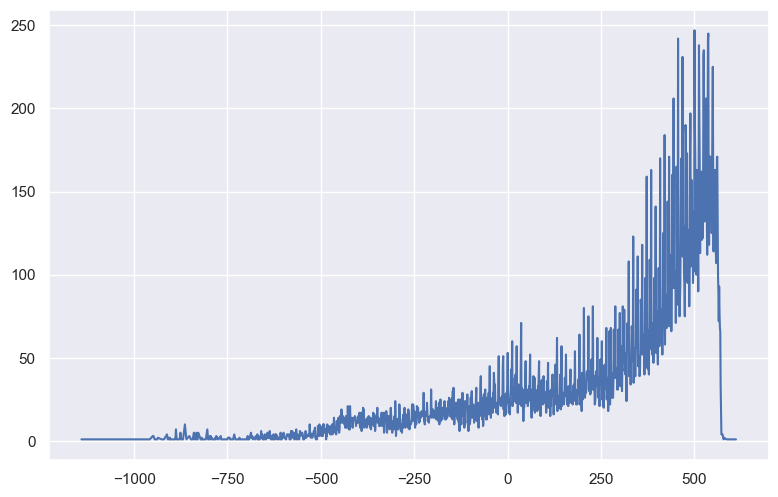

In [295]:
fig_7 = plt.figure(figsize=(8,5),dpi=100)
axes_7 = fig_7.add_axes([0.1,0.1,0.9,0.9])
plt.plot(x_axes, y_axes)

In [ ]:
x_axes

<AxesSubplot:xlabel='release_date'>

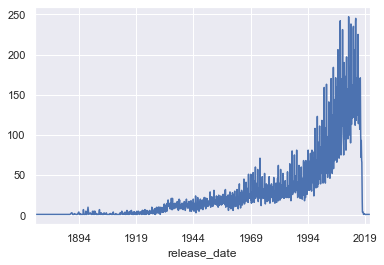

In [233]:
released_movies_Y.plot()

In [29]:
dates = matplotlib.dates.date2num(released_movies_Y)

In [310]:
movies_df.sort_values(by='release_date', ascending=False)

,title,release_date,original_language,genres,budget,revenue,production_countries,runtime,vote_average,vote_count
26558,Avatar 2,2020-12-16,en,"[Action, Adventure, Fantasy, Science Fiction]",0,0.0,[United States of America],0.0,0.0,58.0
38882,The Other Side of the Wind,2018-12-31,en,"[Comedy, Drama]",12000000,0.0,"[Iran, United States of America]",0.0,0.0,1.0
30400,Bad Boys for Life,2018-11-07,en,"[Thriller, Action, Crime]",0,0.0,[United States of America],0.0,0.0,12.0
38127,Mary Shelley,2018-04-25,en,"[Drama, Romance]",0,0.0,"[Ireland, Luxembourg, United Kingdom]",0.0,0.0,1.0
44532,Mobile Homes,2018-04-04,en,[Drama],0,0.0,"[France, Canada]",105.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
45145,Engineering Red,NaT,ru,[],0,0.0,[],76.0,6.0,2.0
45200,All Superheroes Must Die 2: The Last Superhero,NaT,en,"[Mystery, Science Fiction]",0,0.0,[],74.0,4.0,1.0
45335,The Land Where the Blues Began,NaT,en,[],0,0.0,[],0.0,0.0,0.0
45407,Aprel,NaT,ru,"[Drama, Crime]",0,0.0,[Russia],NaN,6.0,1.0


El final de la línea sufre un brusco descenso en cantidad de películas. Haciendo una exploración rápida de la tabla vemos como hay películas que han sido añadidas más allá de la fecha en la que se generó este dataset (2017). Obviamente, muchos de los datos para estas películas no están recogidos, como por ejemplo la recaudación o tiempo de exposición.

### -original_language

In [ ]:
movies_df

In [ ]:
#%matplotlib inline

In [291]:
lan_cunt = movies_df.groupby('original_language').original_language.count().sort_values(ascending=False)
lan_cunt.head(6)

original_language
en    32269
fr     2438
it     1529
ja     1350
de     1080
es      994
Name: original_language, dtype: int64

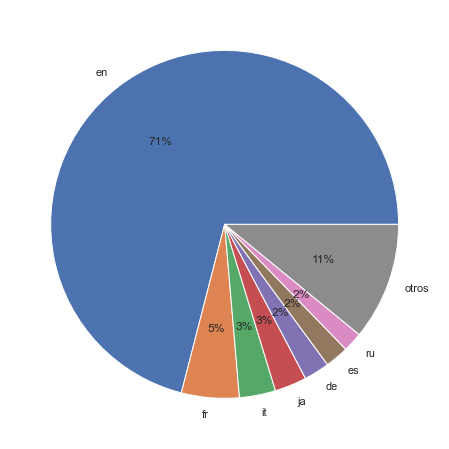

In [292]:
plt.figure(figsize=(8,8))

#plt.style.use('ggplot')

sns.set()

rest = lan_cunt.values[7:].sum()
lan_num = list(lan_cunt.values[:7]) + [rest]
lan = list(lan_cunt.index[:7]) + ['otros']


tarta = plt.pie(lan_num, labels=lan, autopct='%1.0f%%')

In [296]:
indian_films = movies_df[movies_df.production_countries.apply(lambda e: 'India' in e)]
indian_films.groupby('original_language').count().sort_values(by=['production_countries'], ascending=False)

,title,release_date,genres,budget,revenue,production_countries,runtime,vote_average,vote_count
original_language,,,,,,,,,
hi,445,445,445,445,445,445,445,445,445
en,179,179,179,179,179,179,179,179,179
ta,77,77,77,77,77,77,77,77,77
ml,35,35,35,35,35,35,35,35,35
te,35,35,35,35,35,35,35,35,35
bn,28,28,28,28,28,28,28,28,28
mr,18,18,18,18,18,18,18,18,18
ab,2,2,2,2,2,2,2,2,2
kn,2,2,2,2,2,2,2,2,2


### -production_countries

In [297]:

countries_expanded_pkl_dir = root_project + '/resources/prod_countries_expanded.pkl'
countries_pkl_df = pd.read_pickle(countries_expanded_pkl_dir)
countries_df = countries_pkl_df.copy()

In [298]:
ordered_countries = countries_df.count().sort_values(ascending=False)

In [299]:
cont_num


[21153, 4094, 3940, 2254, 2169, 1765, 1648, 4966]

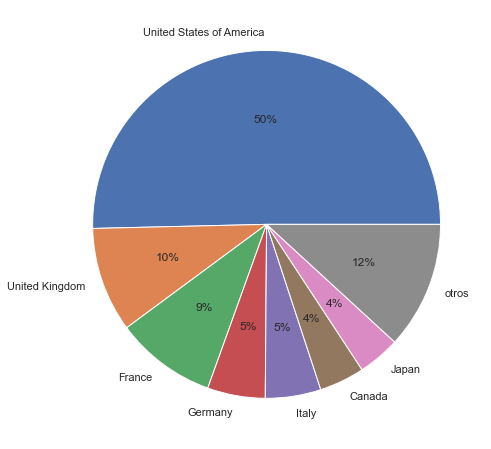

In [166]:
plt.figure(figsize=(8,8))

#plt.style.use('ggplot')

#sns.set()

rest_countries = ordered_countries.values[7:].sum()
cont_num = list(ordered_countries.values[:7]) + [rest]
cont = list(ordered_countries.index[:7]) + ['otros']


tarta_paises = plt.pie(cont_num, labels=cont, autopct='%1.0f%%')

### -genres

In [300]:
genre_expanded_pkl_dir = root_project + '/resources/genre_df_expanded.pkl'
genre_pkl_df = pd.read_pickle(genre_expanded_pkl_dir)
genre_expand_df = genre_pkl_df.copy()

In [301]:
genre_count = genre_expand_df.count().sort_values(ascending=False)

In [302]:
genre_count.index

Index(['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime',
       'Documentary', 'Adventure', 'Science Fiction', 'Family', 'Mystery',
       'Fantasy', 'Animation', 'Foreign', 'Music', 'History', 'War', 'Western',
       'TV Movie'],
      dtype='object')

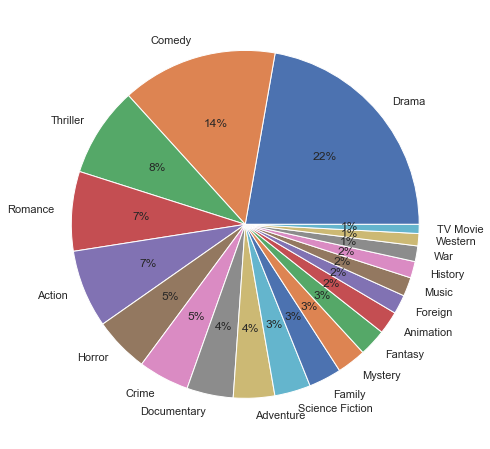

In [199]:
plt.figure(figsize=(8,8))

#plt.style.use('ggplot')

#sns.set()

#rest_genre = genre_expand_df.values[7:].sum()
genre_num = genre_count.values
genre = genre_count.index

tarta_paises = plt.pie(genre_num, labels=genre, autopct='%1.0f%%', startangle=0)

100.0

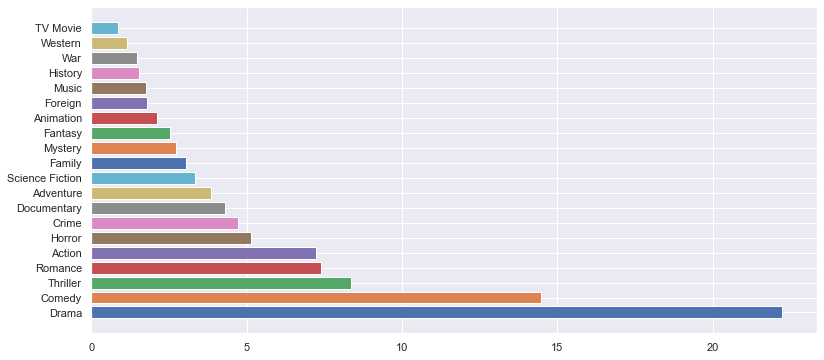

In [400]:
plt.figure(figsize=(13,6))
percen_total = 0
for i,gen in enumerate(genre_count):
    x = (gen/genre_count.sum())*100
    percen_total += x
    label = genre_count.index[i]
    plt.barh(label, x)

percen_total

### -budget

<function matplotlib.pyplot.close(fig=None)>

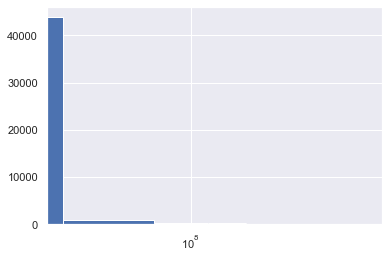

In [333]:
hist, bins, _ = plt.hist(movies_df.budget.values, bins=10)
#logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))

#plt.hist(movies_df.budget.values, bins=logbins)
plt.xscale('log')

plt.close

In [342]:
sin_0 = movies_df.drop(movies_df[movies_df.budget == 0].index, axis=0)


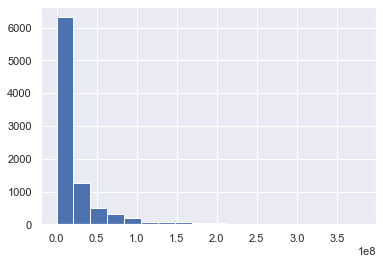

In [378]:
hist, bins, _ = plt.hist(sin_0.budget.values, bins=18)

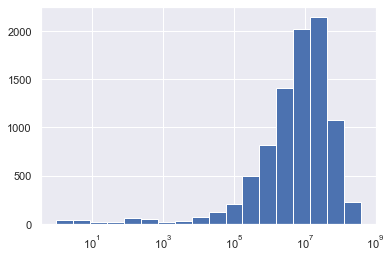

In [379]:
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))

plt.hist(sin_0.budget.values, bins=logbins)
plt.xscale('log')


### -revenue

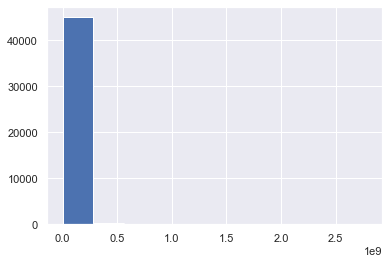

In [371]:
hist,bins, _ = plt.hist(movies_df.revenue.values)


In [359]:
rev_without_0 = movies_df[movies_df.revenue > 0]

<function matplotlib.pyplot.close(fig=None)>

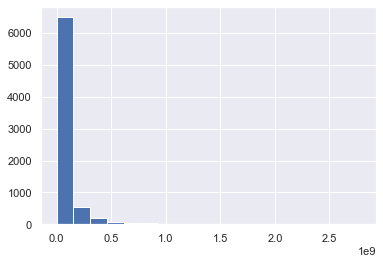

In [374]:
hist, bins, _ = plt.hist(rev_without_0.revenue.values, bins=18)
plt.close

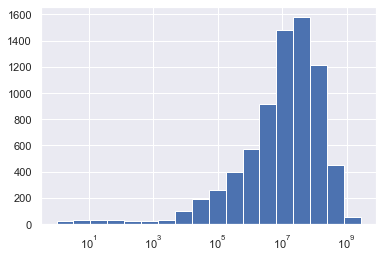

In [375]:
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))

plt.hist(rev_without_0.revenue.values, bins=logbins)
plt.xscale('log')

### -runtime

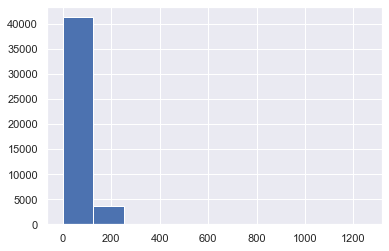

In [402]:
run = plt.hist(movies_df.runtime.values)

In [403]:
run_without_0 = movies_df[movies_df.runtime > 0]

In [414]:
run_less_10 = movies_df[movies_df.runtime == 0]


(array([3.9902e+04, 3.5650e+03, 1.1500e+02, 3.4000e+01, 1.3000e+01,
        5.0000e+00, 5.0000e+00, 3.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([1.0000e+00, 1.2650e+02, 2.5200e+02, 3.7750e+02, 5.0300e+02,
        6.2850e+02, 7.5400e+02, 8.7950e+02, 1.0050e+03, 1.1305e+03,
        1.2560e+03]),
 <BarContainer object of 10 artists>)

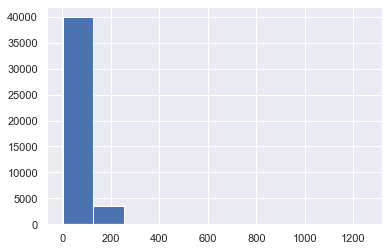

In [405]:
plt.hist(run_without_0.runtime.values)

In [435]:
drop_NaNs = movies_df[movies_df.runtime.isnull()].runtime
runtime_dropped = movies_df.drop(drop_NaNs.index).runtime

<function matplotlib.pyplot.show(close=None, block=None)>

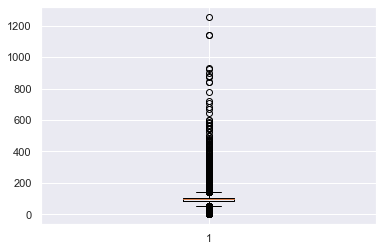

In [436]:
plt.boxplot(runtime_dropped)
plt.show

In [441]:
movies_df[movies_df.runtime == movies_df.runtime.max()]

,title,release_date,original_language,genres,budget,revenue,production_countries,runtime,vote_average,vote_count
24177,Centennial,1978-10-01,en,"[Drama, History]",0,0.0,[United States of America],1256.0,7.9,8.0


Quitando los valores iguales a 0

<function matplotlib.pyplot.show(close=None, block=None)>

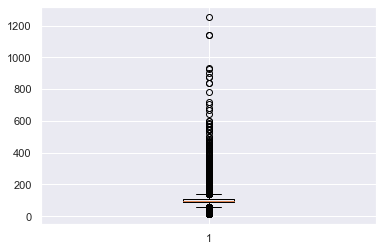

In [438]:
run_drop_sin_0 = runtime_dropped[runtime_dropped > 10]

plt.boxplot(run_drop_sin_0)
plt.show

### -vote_average

(array([ 3012.,   194.,   530.,  1614.,  4538., 11329., 14643.,  7705.,
         1498.,   397.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

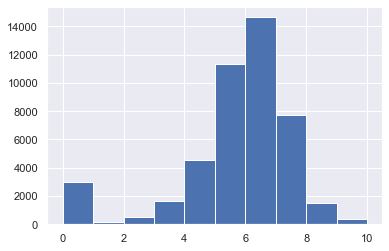

In [448]:
plt.hist(movies_df.vote_average)

## Correlation Matrix

In [467]:
movies_df.dtypes

title                           object
release_date            datetime64[ns]
original_language               object
genres                          object
budget                           int64
revenue                        float64
production_countries            object
runtime                        float64
vote_average                   float64
vote_count                     float64
dtype: object

In [471]:
movies_df.select_dtypes(['number'])

,budget,revenue,runtime,vote_average,vote_count
0,30000000,373554033.0,81.0,7.7,5415.0
1,65000000,262797249.0,104.0,6.9,2413.0
2,0,0.0,101.0,6.5,92.0
3,16000000,81452156.0,127.0,6.1,34.0
4,0,76578911.0,106.0,5.7,173.0
...,...,...,...,...,...
45458,0,0.0,90.0,4.0,1.0
45459,0,0.0,360.0,9.0,3.0
45460,0,0.0,90.0,3.8,6.0
45461,0,0.0,87.0,0.0,0.0


In [ ]:
c = movies_df.select_dtypes(['number'])
sns.heatmap(movies_df.select_dtypes(['number']), cmap="BrBG",annot=True)